In [2]:
import numpy as np
import scipy.fft as fft
from scipy.interpolate import interp1d

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 20
plt.style.use("seaborn-deep")

matplotlib.rc('text', usetex='True')
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
matplotlib.rcParams['xtick.top'] = True
matplotlib.rcParams['ytick.right'] = True

matplotlib.rcParams['pgf.texsystem'] = 'pdflatex'
matplotlib.rcParams.update({'pgf.rcfonts' : False})
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'


In [4]:
rho_gf = 1.61930347e-18                                                                                                       
press_gf = 1.80171810e-39                                                                                                     
eps_gf = 1.11265006e-21                                                                                                       
time_gf = 2.03001708e+05                                                                                                      
mass_gf = 5.02765209e-34                                                                                                      
length_gf = 6.77140812e-06                                                                                                    
energy_gf = 5.59424238e-55                                                                                                    
lum_gf = 2.7556091e-60
gr_ms_gf = energy_gf/(length_gf**3 * time_gf)
gri_ms_gf = 4*np.pi/gr_ms_gf
print(gri_ms_gf)

tu = 1.60668219e-6
denu = 5.80783413e18
runit= 4.81671204e4
eunit = 3.3e45
punit = denu*runit**2 / tu**2
munit = denu*runit**3
time_step = 1.00e-1
msun = 1.9891e33

sun_length=msun/denu/runit**3

1.4158108849913645e+45


In [5]:
psi4 = np.loadtxt("psi4_002.dat")
psi4.shape

(249827, 21)

In [120]:
def h_from_psi4(psi4,f0=10,number_extract = 5,number_ell = 3):
    
    t2 = np.linspace(psi4[0,0]*tu,psi4[-1,0]*tu,len(8*psi4[:,0]))
    dt = t2[1]-t2[0]
    fastest_length = fft.next_fast_len(len(t2))
    freq = fft.fftfreq(fastest_length, d=dt)
    psi4_ip = interp1d(psi4[:,0]*tu,psi4[:,1:],axis=0)
    psi4_t2 = psi4_ip(t2)
    
    psi4_fft = np.zeros([number_extract*number_ell,fastest_length],dtype=complex)
    psi4_ifft = np.zeros([number_extract*number_ell,fastest_length],dtype=complex)
    i = 0
    k = 0
    print((number_extract)*(number_ell+1))
    for i in range(0,(number_extract)*(number_ell+1)):
        j = i%(number_ell+1)
        if(j == 0): 
            continue
        else:
            psi4_fft[k,:] = fft.fft(psi4_t2[:,i],fastest_length)
            print(k,i)
            k =k+1
            
    freq_filter = freq
    for i,f in enumerate(freq_filter):
        if(np.abs(f) < f0):
            if(f >= 0):
                freq_filter[i] = f0
            else:
                freq_filter[i] = -f0
    #freq_filter[np.abs(freq_filter) < f0] = np.sign(freq_filter)*f0
    #psi4_ffi = -(psi4_fft/freq_filter)/(psi4_fft/freq_filter)**2
    psi4_ffi = psi4_fft/freq_filter**2
    for i in range(0,number_extract*number_ell):
        psi4_ifft[i,:] = fft.ifft(psi4_ffi[i,:])
    return [t2,freq,psi4_t2,psi4_fft,psi4_ifft]

In [121]:
t2,freq,psi4_t2,psi4_fft,psi4_ifft = h_from_psi4(psi4,f0=1)
print(psi4_ifft.shape)
print(psi4_fft.shape)

20
0 1
1 2
2 3
3 5
4 6
5 7
6 9
7 10
8 11
9 13
10 14
11 15
12 17
13 18
14 19
(15, 250000)
(15, 250000)


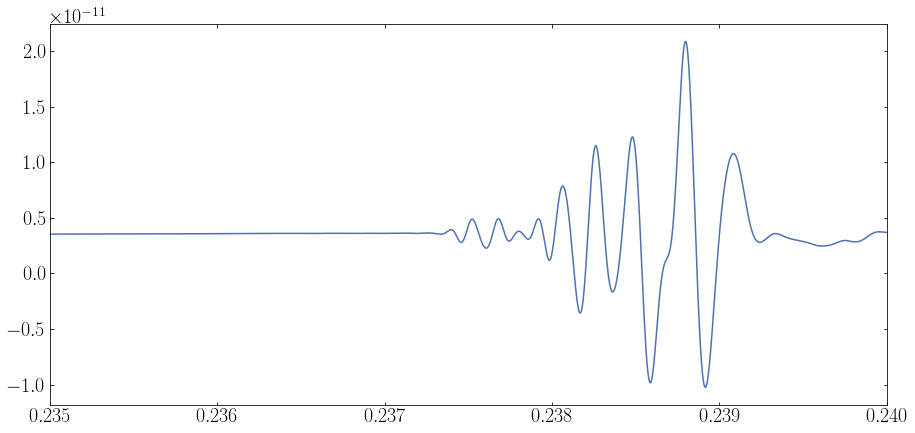

In [122]:
f,ax = plt.subplots(figsize = (15,7))
#ax.plot(freq[0:200],np.log10(np.abs(psi4_ifft[12,0:200])))
ax.set_xlim([0.235,0.240])
ax.plot(t2,psi4_t2[:,18])
#ax.plot(psi4[:,0],psi4[:,17])

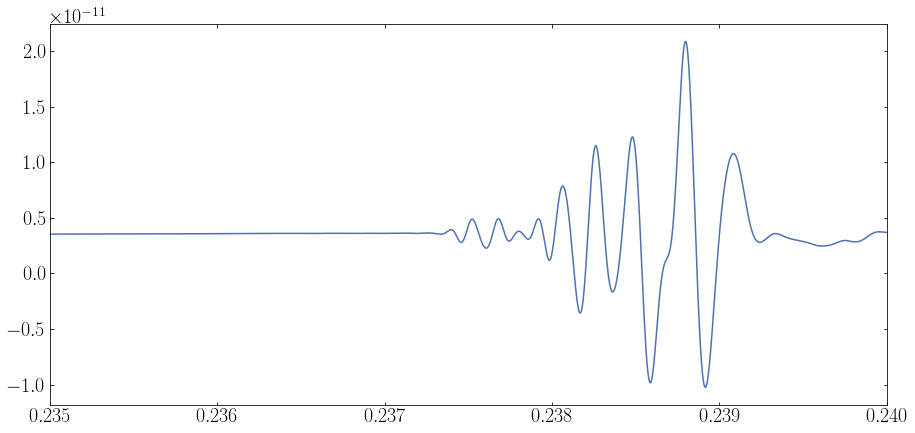

In [123]:
f,ax = plt.subplots(figsize = (15,7))
#ax.plot(freq[0:200],np.log10(np.abs(psi4_ifft[12,0:200])))
ax.set_xlim([0.235,0.240])
ax.plot(t2,psi4_t2[:,18])
#ax.plot(psi4[:,0],psi4[:,17])

(0.2, 0.2002)

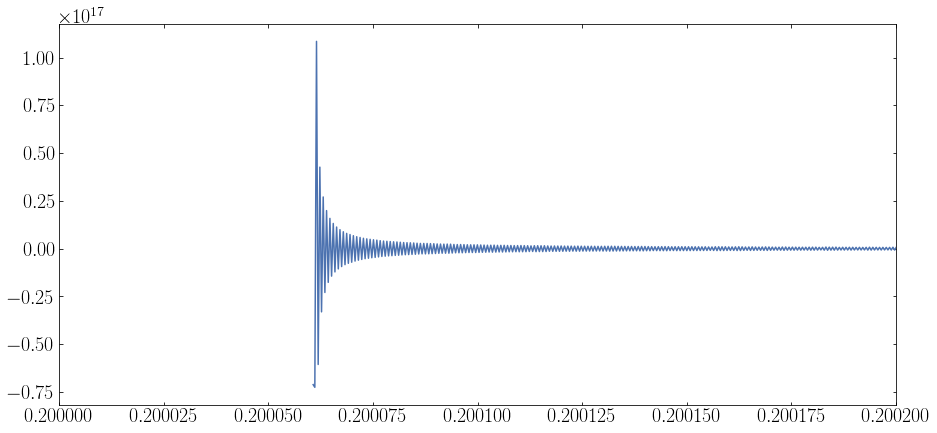

In [133]:
f,ax = plt.subplots(figsize = (15,7))
ax.plot(t2,(psi4_ifft[12,0:len(t2)].imag))
ax.set_xlim([0.2,0.2002])
#ax.set_xlim([0,200])
#ax.plot(t2,psi4_t2[:,18])
#ax.plot(psi4[:,0],psi4[:,17])

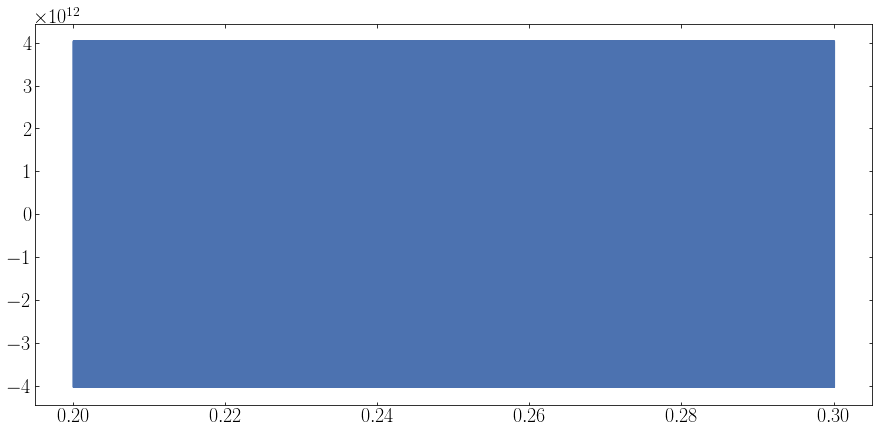

In [125]:
f,ax = plt.subplots(figsize = (15,7))
ax.plot(t2,(psi4_ifft[12,0:len(t2)].real))
#ax.set_xlim([0.235,0.250])
#ax.plot(t2,psi4_t2[:,17])
#ax.set_xlim([0.0,0.21])
#ax.set_xlim([0,200])
#ax.plot(t2,psi4_t2[:,18])
#ax.plot(psi4[:,0],psi4[:,17])

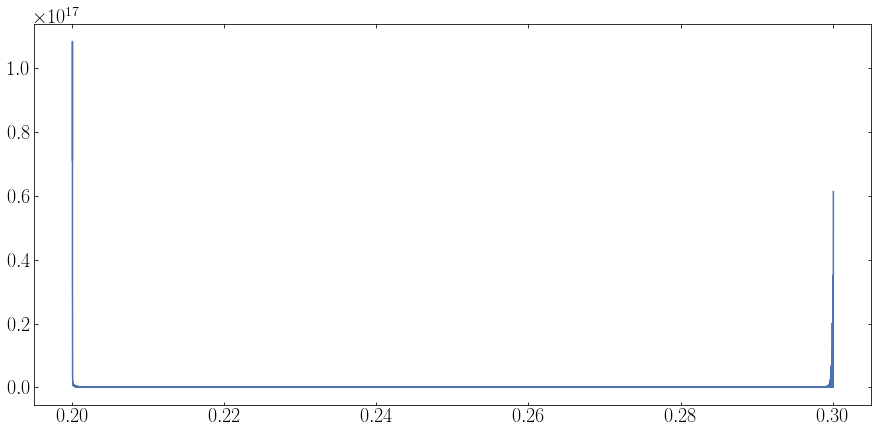

In [126]:
f,ax = plt.subplots(figsize = (15,7))
ax.plot(t2,np.abs(psi4_ifft[12,0:len(t2)]))
#ax.set_xlim([0.2,0.21])
#ax.set_xlim([0,200])
#ax.plot(t2,psi4_t2[:,18])
#ax.plot(psi4[:,0],psi4[:,17])


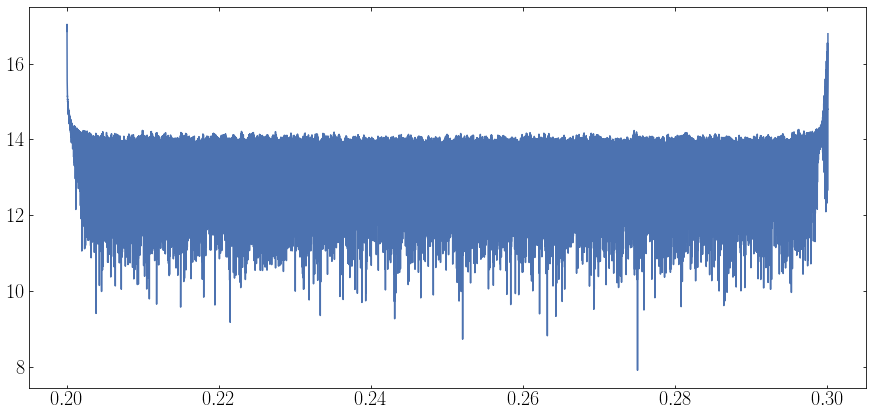

In [127]:
f,ax = plt.subplots(figsize = (15,7))
ax.plot(t2,np.log10(np.abs(psi4_ifft[12,0:len(t2)].imag)))
#ax.set_xlim([0,200])
#ax.plot(t2,psi4_t2[:,18])
#ax.plot(psi4[:,0],psi4[:,17])

In [128]:
psi4_ifft[12,:]

array([ 4.03044901e+12-7.11280886e+16j, -4.03044901e+12-7.25223193e+16j,
        4.03044901e+12+1.08445347e+17j, ...,
       -4.03044901e+12+4.12167256e+16j,  4.03044901e+12-5.91903909e+16j,
       -4.03044901e+12+1.07065185e+17j])

In [129]:
500*3.1*4.81671204e4/1e5

746.5903662000001

In [130]:
sun_length

3.06471689518499

In [131]:
glo = np.loadtxt("glo_s12.0_SFHoTimmesral1.02grid_space2.5e5_psi4testrun_stop200ms_002.dat")
glo.shape

(9994, 30)

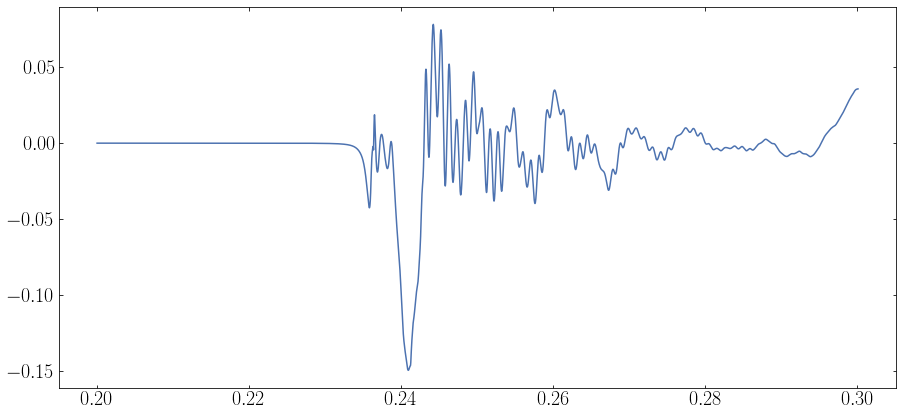

In [132]:
f,ax = plt.subplots(figsize = (15,7))
ax.plot(glo[:,0]*tu,glo[:,24]-glo[:,23])
#ax.plot(glo[:,0]*tu,glo[:,10]-glo[:,9])